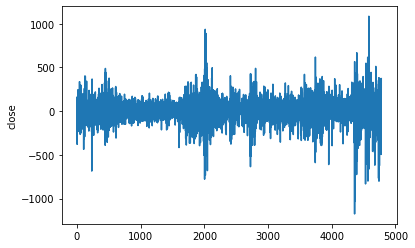

In [17]:
import os
from keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler
from tensorflow.python import keras
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import numpy as np
from pandas import read_csv
import pandas as pd
import matplotlib.pyplot as plt

dataset = pd.read_csv('C:\\Users\\Mirela\\PycharmProjects\\untitled2\\data_dir\\DJI.csv',
                      usecols=[4]).values.astype('float32')


def delta_time_series(data):
    return data[1:] - data[:-1]


dataset.shape


def plot_delta(data):
    plt.plot(delta_time_series(data))
    plt.ylabel('close')
    plt.show()


plot_delta(dataset)

dataset = delta_time_series(dataset)

# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

# split into train and test sets

train, val, test = dataset[0:3000, :], dataset[3001:4000, :], dataset[4001:None, :]

lookback = 5
step = 1
batch_size = 128

train_data_gen = TimeseriesGenerator(train, train,
                                     length=lookback, sampling_rate=step, stride=1,
                                     batch_size=batch_size)

val_data_gen = TimeseriesGenerator(val, val,
                                   length=lookback, sampling_rate=step, stride=1,
                                   batch_size=batch_size)

test_data_gen = TimeseriesGenerator(test, test,
                                    length=lookback, sampling_rate=step, stride=1,
                                    batch_size=batch_size)

val_steps = (4000 - 3001 - lookback)
test_steps = (len(dataset) - 4001 - lookback)



Epoch 1/10
500/500 [==============================] - 17s 35ms/step - loss: 0.0509 - val_loss: 0.0360
Epoch 2/10
500/500 [==============================] - 17s 34ms/step - loss: 0.0405 - val_loss: 0.0316
Epoch 3/10
500/500 [==============================] - 17s 34ms/step - loss: 0.0402 - val_loss: 0.0575
Epoch 4/10
500/500 [==============================] - 17s 35ms/step - loss: 0.0399 - val_loss: 0.0396
Epoch 5/10
500/500 [==============================] - 17s 34ms/step - loss: 0.0396 - val_loss: 0.0339
Epoch 6/10
500/500 [==============================] - 17s 34ms/step - loss: 0.0396 - val_loss: 0.0316
Epoch 7/10
500/500 [==============================] - 17s 34ms/step - loss: 0.0395 - val_loss: 0.0561
Epoch 8/10
500/500 [==============================] - 17s 34ms/step - loss: 0.0395 - val_loss: 0.0384
Epoch 9/10
500/500 [==============================] - 17s 34ms/step - loss: 0.0393 - val_loss: 0.0339
Epoch 10/10
500/500 [==============================] - 17s 35ms/step - loss: 0.039

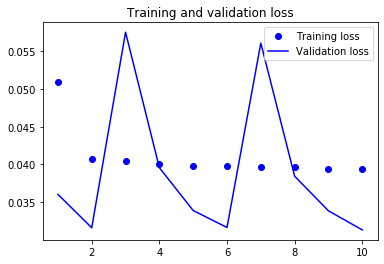

In [12]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model = Sequential()
model.add(layers.GRU(32, input_shape=(None, dataset.shape[-1])))
model.add(layers.Dense(1))
model.compile(optimizer=RMSprop(), loss='mae')
history = model.fit_generator(train_data_gen,
                              steps_per_epoch=500,
                              epochs=10,
                              validation_data=val_data_gen,
                              validation_steps=val_steps)

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

Epoch 1/10
500/500 [==============================] - 19s 39ms/step - loss: 0.0560 - val_loss: 0.0532
Epoch 2/10
500/500 [==============================] - 18s 36ms/step - loss: 0.0405 - val_loss: 0.0428
Epoch 3/10
500/500 [==============================] - 18s 36ms/step - loss: 0.0396 - val_loss: 0.0576
Epoch 4/10
500/500 [==============================] - 18s 36ms/step - loss: 0.0396 - val_loss: 0.0404
Epoch 5/10
500/500 [==============================] - 19s 37ms/step - loss: 0.0395 - val_loss: 0.0402
Epoch 6/10
500/500 [==============================] - 18s 37ms/step - loss: 0.0393 - val_loss: 0.0341
Epoch 7/10
500/500 [==============================] - 18s 36ms/step - loss: 0.0392 - val_loss: 0.0574
Epoch 8/10
500/500 [==============================] - 18s 36ms/step - loss: 0.0393 - val_loss: 0.0394
Epoch 9/10
500/500 [==============================] - 18s 36ms/step - loss: 0.0390 - val_loss: 0.0354
Epoch 10/10
500/500 [==============================] - 19s 38ms/step - loss: 0.039

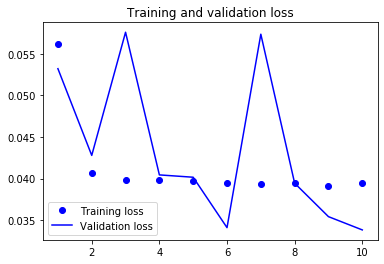

In [13]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model = Sequential()
model.add(layers.GRU(32,
                     dropout=0.1,
                     recurrent_dropout=0.5,
                     return_sequences=True,
                     input_shape=(None, dataset.shape[-1])))
model.add(layers.GRU(64, activation='relu',
                     dropout=0.1,
                     recurrent_dropout=0.5))
model.add(layers.Dense(1))
model.compile(optimizer=RMSprop(), loss='mae')
history = model.fit_generator(train_data_gen,
                              steps_per_epoch=500,
                              epochs=10,
                              validation_data=val_data_gen,
                              validation_steps=val_steps)
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

Epoch 1/10
500/500 [==============================] - 18s 35ms/step - loss: 0.0549 - val_loss: 0.0384
Epoch 2/10
500/500 [==============================] - 17s 34ms/step - loss: 0.0398 - val_loss: 0.0331
Epoch 3/10
500/500 [==============================] - 17s 35ms/step - loss: 0.0396 - val_loss: 0.0575
Epoch 4/10
500/500 [==============================] - 17s 35ms/step - loss: 0.0395 - val_loss: 0.0369
Epoch 5/10
500/500 [==============================] - 17s 35ms/step - loss: 0.0394 - val_loss: 0.0340
Epoch 6/10
500/500 [==============================] - 18s 36ms/step - loss: 0.0394 - val_loss: 0.0335
Epoch 7/10
500/500 [==============================] - 17s 35ms/step - loss: 0.0393 - val_loss: 0.0560
Epoch 8/10
500/500 [==============================] - 17s 35ms/step - loss: 0.0393 - val_loss: 0.0370
Epoch 9/10
500/500 [==============================] - 17s 35ms/step - loss: 0.0392 - val_loss: 0.0346 - loss: 0.03
Epoch 10/10
500/500 [==============================] - 17s 34ms/step 

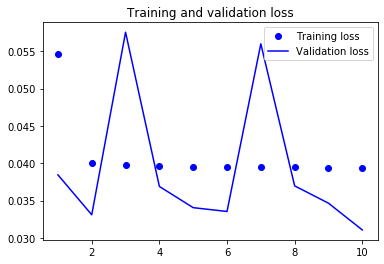

In [14]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model = Sequential()
model.add(layers.GRU(32,
                     dropout=0.2,
                     recurrent_dropout=0.2,
                     input_shape=(None, dataset.shape[-1])))
model.add(layers.Dense(1))
model.compile(optimizer=RMSprop(), loss='mae')
history = model.fit_generator(train_data_gen,
                              steps_per_epoch=500,
                              epochs=10,
                              validation_data=val_data_gen,
                              validation_steps=val_steps)

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

Epoch 1/10
500/500 [==============================] - 19s 38ms/step - loss: 0.0576 - val_loss: 0.0588
Epoch 2/10
500/500 [==============================] - 18s 37ms/step - loss: 0.0405 - val_loss: 0.0471
Epoch 3/10
500/500 [==============================] - 19s 38ms/step - loss: 0.0396 - val_loss: 0.0609
Epoch 4/10
500/500 [==============================] - 18s 37ms/step - loss: 0.0394 - val_loss: 0.0401
Epoch 5/10
500/500 [==============================] - 19s 37ms/step - loss: 0.0395 - val_loss: 0.0405
Epoch 6/10
500/500 [==============================] - 18s 36ms/step - loss: 0.0392 - val_loss: 0.0369
Epoch 7/10
500/500 [==============================] - 19s 38ms/step - loss: 0.0392 - val_loss: 0.0581
Epoch 8/10
500/500 [==============================] - 19s 39ms/step - loss: 0.0391 - val_loss: 0.0389
Epoch 9/10
500/500 [==============================] - 18s 36ms/step - loss: 0.0393 - val_loss: 0.0367
Epoch 10/10
500/500 [==============================] - 18s 37ms/step - loss: 0.039

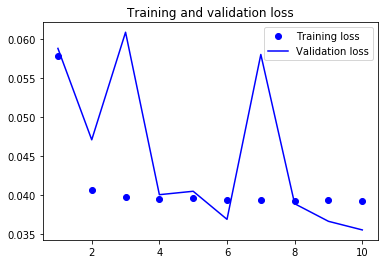

In [15]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model = Sequential()
model.add(layers.GRU(32,
                     dropout=0.1,
                     recurrent_dropout=0.5,
                     return_sequences=True,
                     input_shape=(None, dataset.shape[-1])))
model.add(layers.GRU(64, activation='relu',
                     dropout=0.1,
                     recurrent_dropout=0.5))
model.add(layers.Dense(1))
model.compile(optimizer=RMSprop(), loss='mae')
history = model.fit_generator(train_data_gen,
                              steps_per_epoch=500,
                              epochs=10,
                              validation_data=val_data_gen,
                              validation_steps=val_steps)
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [18]:
test_loss = model.evaluate_generator(test_data_gen,steps=test_steps)
print('test loss:', test_loss)


test loss: 0.03332440182566643


In [19]:
testPredict = model.predict_generator(test_data_gen)
testPredict.shape

(772, 1)

In [20]:
testPredict = scaler.inverse_transform(testPredict)